### Dependencies

In [2]:
import numpy as np # Scientific computing library.
import matplotlib.pyplot as plt # Plotting library.
import pandas as pd # To read and sort data frames
from statsmodels.nonparametric.smoothers_lowess import lowess # Curve smoother

### Accuracy vs Training Data

The last layer of Inception-v3 was trainined using the 40x, 100x, 200x, and 400x images from the BreakHis dataset (https://web.inf.ufpr.br/vri/databases/breast-cancer-histopathological-database-breakhis/). This resulted in four classifiers, where each classifier corresponds to a particular magnification.

Nine classifiers were made for each magnification. Each of the nine classifiers corresponds to a different training and test set split. For example, if the training set was assigned to be 80% of the images then the test set would be assigned to be 10% of the images (cross-validation set is always 10%). The accuracies were calculated using the test sets.

In [5]:
# 40x
test_size_40 = [187, 390, 605, 814, 1018, 1213, 1415, 1611, 1702]
accuracy_40 = [90.4, 90.5, 91.6, 90.5, 89.8, 89.8, 88.9, 86.5, 86]
total_size_40 = 1995
validation_size_40 = 199

# 100x
test_size_100 = [217, 410, 623, 815, 1041, 1245, 1459, 1678, 1786]
accuracy_100 = [89.4, 92.4, 92.5, 90.7, 90.5, 87.9, 86.5, 80.0, 76.7]
total_size_100 = 2081
validation_size_100 = 208

# 200x
test_size_200 = [208, 406, 640, 846, 1052, 1251, 1427, 1611, 1710]
accuracy_200 = [90.4, 89.4, 87.5, 88.7, 89.5, 88.8, 88.2, 85.5, 82.0]
total_size_200 = 2013
validation_size_200 = 201

# 400x
test_size_400 = [159, 319, 479, 659, 852, 1046, 1235, 1416, 1514]
accuracy_400 = [84.3, 85.0, 84.1, 85.1, 85.1, 85.2, 85.6, 84.2, 81.5]
total_size_400 = 1820
validation_size_400 = 182

###  Accuracy as a function of the training size for all magnifications

It is unclear which of the $40x$, $100x$, or $200x$ magnifications provides the most useful information with regards to classification. Ideally, I would have generated several accuracy vs. training size curves for each magnification because that would allow for the variance of each curve to be quantified. Unfortunately, it took roughly an hour to get each data point in the below plot, and so, it was unpractical to quantify the uncertainty of each point. Future studies can improve upon this issue. Though, it is worth mentioning that the model which was created using the images at $40\times$ magnification has an accuracy of about 86\% after being trained with only about 300 images. This may suggest that the images at $40\times$ magnification provide the most discriminative information because the model has learned to identify benign tumors from malignant to high accuracy with very little data.

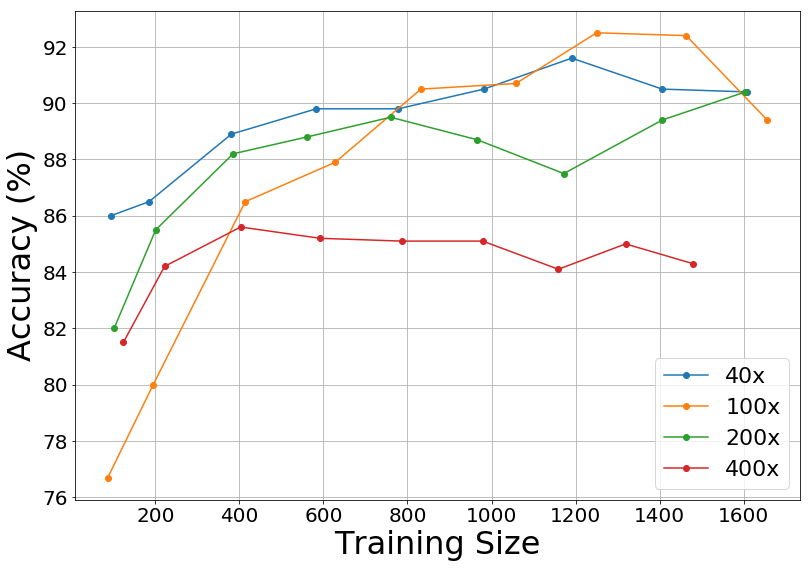

In [6]:
# Calculate training set given test set and validation set size
train_size_40 = [total_size_40 - (x + validation_size_40) for x in test_size_40]
train_size_100 = [total_size_100 - (x + validation_size_100) for x in test_size_100]
train_size_200 = [total_size_200 - (x + validation_size_200) for x in test_size_200]
train_size_400 = [total_size_400 - (x + validation_size_400) for x in test_size_400]

plt.figure(figsize=(13, 9))
plt.plot(train_size_40, accuracy_40, '-o', label='40x')
plt.plot(train_size_100, accuracy_100, '-o', label='100x')
plt.plot(train_size_200, accuracy_200,'-o', label='200x')
plt.plot(train_size_400, accuracy_400,'-o', label='400x')
plt.ylabel('Accuracy (%)', fontsize=32)
plt.xlabel('Training Size', fontsize=32)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.legend(loc='best', fontsize=22)
plt.show()
plt.close() 

### Accuracy and Cross-Entropy Loss as a Function of Iterations

For a particular magnification, the data set of images was split into a training, cross-validation, and test set. The cross-validation set was assigned to be 10% of the data, whilst many different ratios of the training and test set were examined. The accuracy of classification, and cross-entropy loss were calculated using the training set and cross-validation set every 10 iterations of gradient descent. Gradient descent was terminated after 4000 iterations. The below two plots display sample graphs of the accuracy and cross-entropy loss as a function of the number of iterations of gradient descent. The accuracy was calculated as

$$ \texttt{Accuracy} = \frac{\texttt{No. images correctly classified}}{\texttt{No. images classified }}. $$

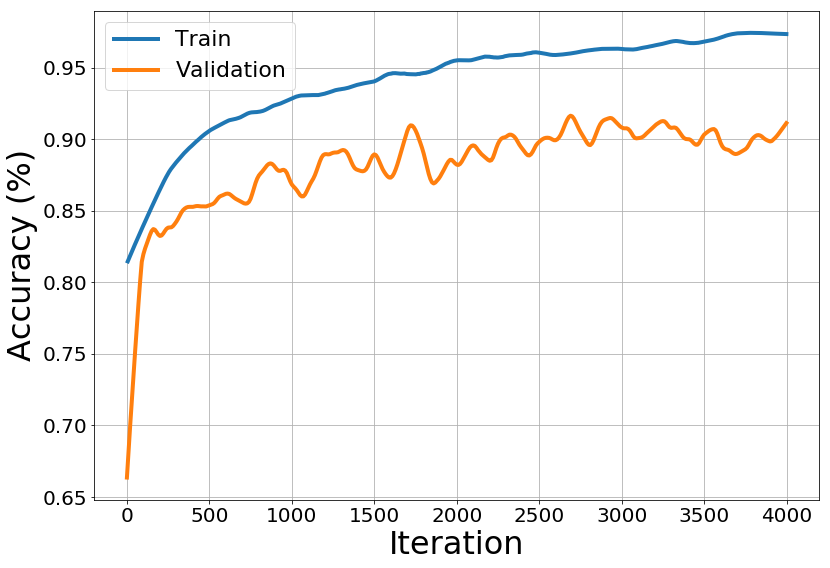

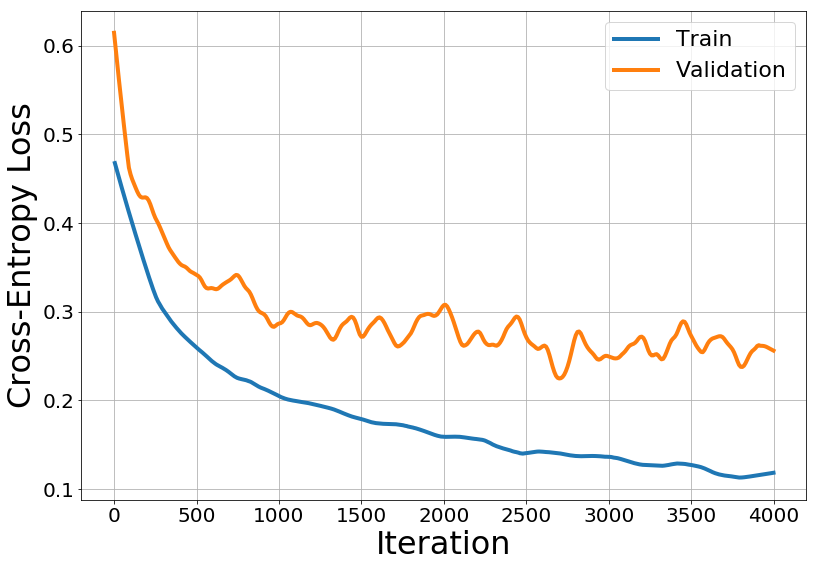

In [5]:
# Load accuracy, and iteration data
train_40_10_acc = pd.read_csv('/Users/bhullara/Desktop/Thesis/Code/inception/iteration_data/40_10_train_acc.csv')
valid_40_10_acc = pd.read_csv('/Users/bhullara/Desktop/Thesis/Code/inception/iteration_data/40_10_cross_acc.csv')
# Load cross-entropy loss, and iteration data
train_40_10_ent = pd.read_csv('/Users/bhullara/Desktop/Thesis/Code/inception/iteration_data/40_10_train_ent.csv')
valid_40_10_ent = pd.read_csv('/Users/bhullara/Desktop/Thesis/Code/inception/iteration_data/40_10_cross_ent.csv')
# Smooth the above loaded data
f_train_40_10_acc = lowess(train_40_10_acc.Value.tolist(), train_40_10_acc.Step.tolist(), is_sorted=True, frac=0.1, it=0)
f_valid_40_10_acc = lowess(valid_40_10_acc.Value.tolist(), valid_40_10_acc.Step.tolist(), is_sorted=True, frac=0.05, it=0)
f_train_40_10_ent = lowess(train_40_10_ent.Value.tolist(), train_40_10_ent.Step.tolist(), is_sorted=True, frac=0.1, it=0)
f_valid_40_10_ent = lowess(valid_40_10_ent.Value.tolist(), valid_40_10_ent.Step.tolist(), is_sorted=True, frac=0.05, it=0)

# Plot accuracy vs iterations
plt.figure(figsize=(13, 9))
plt.plot(f_train_40_10_acc[:,0], f_train_40_10_acc[:,1], '-', lw=4, label='Train')
plt.plot(f_valid_40_10_acc[:,0], f_valid_40_10_acc[:,1], '-', lw=4, label='Validation')
plt.ylabel('Accuracy (%)', fontsize=32)
plt.xlabel('Iteration', fontsize=32)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.legend(loc='best', fontsize=22)
plt.show()
plt.close()

# Plot cross-entropy loss vs iterations
plt.figure(figsize=(13, 9))
plt.plot(f_train_40_10_ent[:,0], f_train_40_10_ent[:,1], '-', lw=4, label='Train')
plt.plot(f_valid_40_10_ent[:,0], f_valid_40_10_ent[:,1], '-', lw=4, label='Validation')
plt.ylabel('Cross-Entropy Loss', fontsize=32)
plt.xlabel('Iteration', fontsize=32)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.legend(loc='best', fontsize=22)
plt.show()
plt.close()